In [12]:
!pip install qiskit
!pip install qiskit-Aer


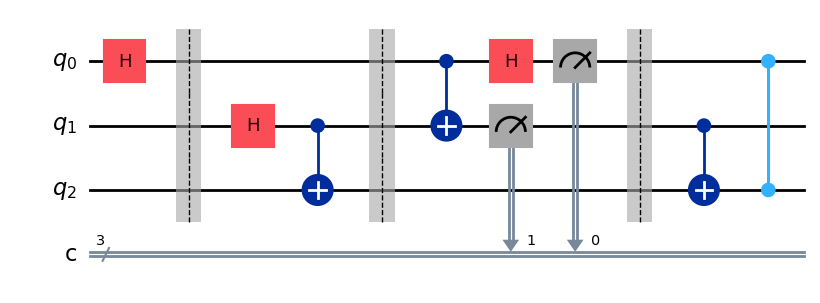

In [21]:
# ======================================
# 📦 Step 0: Install & Import Dependencies
# ======================================
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet
!pip install qiskit--Aer

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from math import pi

# ======================================
# 🧠 Step 1: Create Quantum Circuit
# ======================================
qc = QuantumCircuit(3, 3)

# Step 1️⃣: Prepare Alice's qubit (the one to teleport)
qc.h(0)  # You can also try qc.x(0) or qc.rx(pi/4,0)
qc.barrier()

# Step 2️⃣: Create entanglement between Alice (q1) and Bob (q2)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Step 3️⃣: Bell measurement on Alice’s two qubits
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])
qc.barrier()

# Step 4️⃣: Bob applies correction gates based on Alice's measurement
qc.cx(1, 2)
qc.cz(0, 2)

# Draw the full teleportation circuit
qc.draw('mpl')

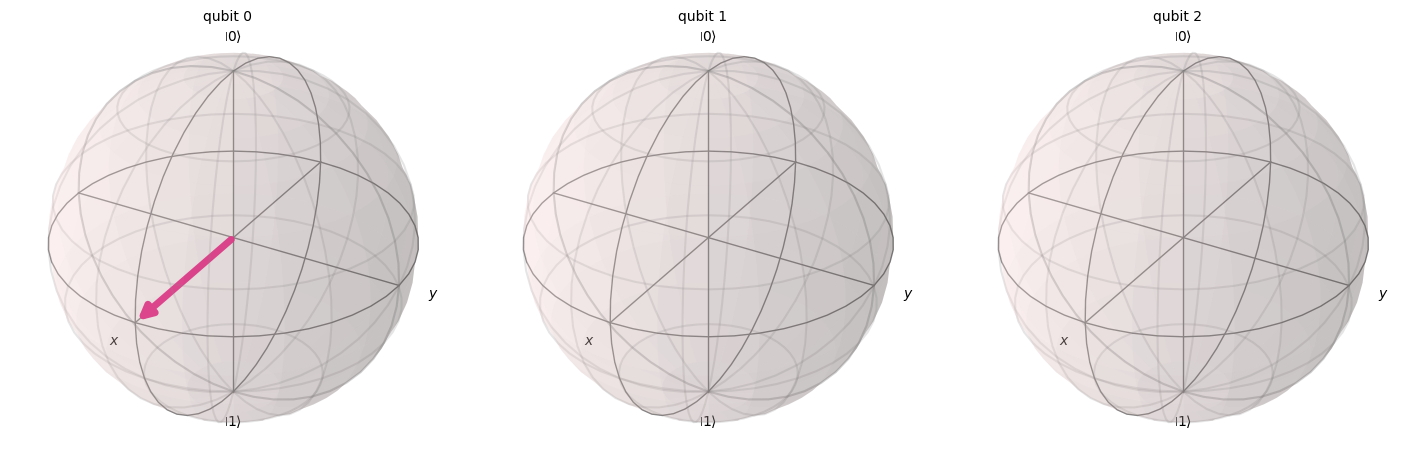

In [19]:
# Create a new circuit (without measurement) for visualization
qc_state = QuantumCircuit(3)

# Prepare Alice's qubit
qc_state.h(0)

# Entangle Alice and Bob
qc_state.h(1)
qc_state.cx(1, 2)

# Show the entangled state vector
state = Statevector.from_instruction(qc_state)
plot_bloch_multivector(state)


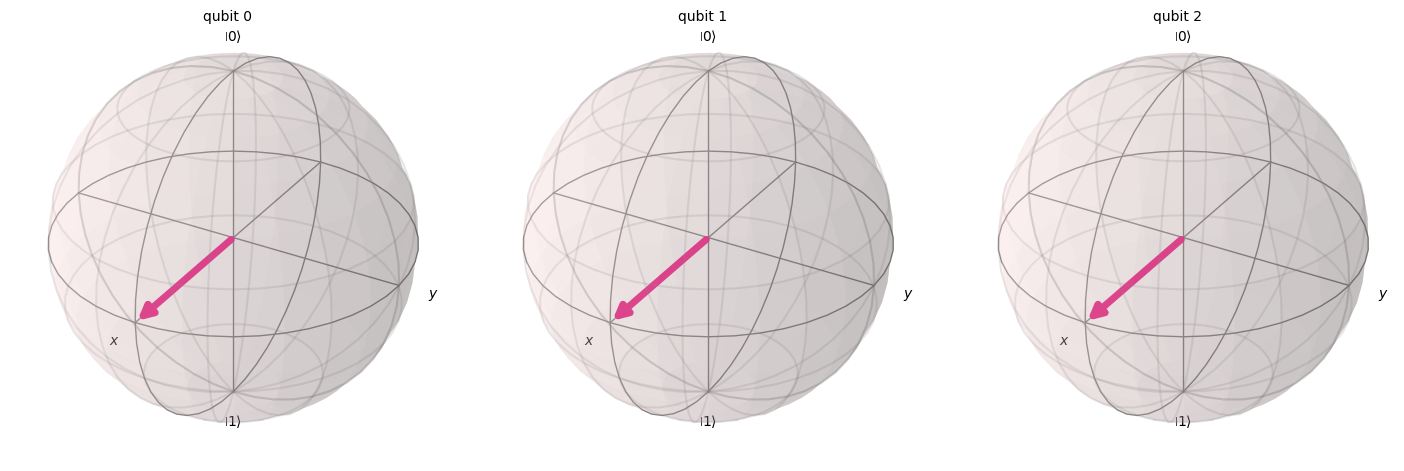

In [20]:
# Create statevector version (no measurements, manual corrections)
qc_verify = QuantumCircuit(3)

# Prepare Alice's qubit (superposition)
qc_verify.h(0)

# Create entanglement
qc_verify.h(1)
qc_verify.cx(1, 2)

# Bell measurement part (without classical bits)
qc_verify.cx(0, 1)
qc_verify.h(0)

# Apply corrections (simulate ideal case)
qc_verify.cx(1, 2)
qc_verify.cz(0, 2)

# Get final statevector
final_state = Statevector.from_instruction(qc_verify)
plot_bloch_multivector(final_state)
